# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import torch, time
from unityagents import UnityEnvironment
from workspace_utils import active_session

In [3]:
# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
# env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### My Implementaion

#### Design Story

I based most of my solution off of the ddpg-pendulum project in the class repository. I uesd that implementaion as a starting point and expanded from there. I had a lot of trouble with this project, my first successful agent hit the 30+ score mark at episode 4 and then carried on at 30+ average  until around episode 80 before going back down into the high twenties. This took a lot of time since my model was slow to train and very frustrating. My model design resulted in that early success but also lead to my downfall. I found that batch normalization layers were very effectoive for this project and had 2 of my fully connected layers batch normalized. This resulted in very large early rewards but very slow train rates. I thought I was on the right track with the Batch Normalization layers so I ended up tweaking almost every other parameter and used all my GPU time before realizing that the Batch Normalization layers were part of the problem. I ended up lowering the number of BN layers to 1, which improved my episode time, but reduced the rate of reward gain. In the end it seemed much more stable and was able to carry on an average of 30+ reward for over 100 episodes. This was a good lesson on using too much of a good thing, and trying to find a balance.

#### Model

##### Agent
The agent model contained 3 fully connected layers, along with my final Batch normailzation layer whis is positioned after the first fullyt connected layer. The interior layers use RELU activation functions and the output layer is a tanh function.

Layers
  Input: The state size, in this case 33
  FC1: 400 Nodes 
  BN: 400 Nodes
  FC2: 300 Nodes 
  Output: 4 Nodes

##### Critic
The critic model contains the exact same structure as the agent, using the 3 fully connected layers and the single batch normalizer. The main differences in the forward step is that we do the action-state concatenation after the first fully connected layer and batch normalizing layer. The concat is then passed through the second fully connected layer and a RELU activation before heading to the output.

Layers
  Input: The state size, in this case 33
  FC1: 400 Nodes 
  BN: 400 Nodes
  FC2: 300 Nodes 
  Output: 1 Value


#### Hyper Parameters 

Number of Episodes: Unknown, set to terminate after hitting 100 30+ episodes or hitting 300 total episodes  
Max Time Steps: 1000  
Replay Buffer Size: int(1e6)  
Mini Batch Size: 128  
Discount Factor: 0.99  
Soft Update for Target Params: 1e-3  
Actor Learning rate: 1e-3  
Critic Learning rate: 1e-3  
Critic Weight Decay: 0  
Volatility Parameter: 0.2     
Speed of Mean Reversion: 0.15  
Noise Multiplier: 1.0  
Noise Multiplyer Reduction Rate: 1e-6  

#### Learning Algorithm
 
For this project I implemented a Deep Deterministic Policy Gradient like we learned in this section of the course. I based this implementation on the ddpg-pendulum project shared in the repository. After initializing the capture variables, we iterate over the agents and begin training episodes. At the start of each episode, we grab the fresh environment info, observe the states, initialize the scores, and reset the agents. We then step into a nested loop which begins the traing steps for the agents. In this nested loop, the agents act on the observed states, then recieve a reward based on the action, and use that to train the models based in the results. This nested loop can be exited either by reaching the max_t parameter value or if any environment done value is flipped. Once we exit the nested loop, we accumulate the scores observed and take the mean value of the output. 

In addition to the original algorithm, I added a few quality of life measures to check for the provided succes state in the project. This was in place since the project takes very long to train, and I did not want to waste any more GPU time then I already had.

In [8]:
def ddpg(max_episodes=300, max_t=1000, score_d=100, print_every=1):
    """
    
    Params
    ======
        max_episodes (int)    : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        score_d (int)         : num episodes used to calcu score
        print_every (int)     : interval to display results
    """
    has_saved = False
    hit_metric_move = False
    hit_metric_curr = False
    good_iters_move = 0
    good_iters_curr = 0
    
    final_scores = []                              
    scores_deque = deque(maxlen=score_d)  
    moving_avgs = []     
    
    for i_episode in range(1, max_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations                       
        scores = np.zeros(num_agents)                           
        agent.reset()
        start_t = time.time()
        
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)       
            env_info = env.step(actions)[brain_name]          
            next_states = env_info.vector_observations         
            rewards = env_info.rewards                     
            dones = env_info.local_done                         

            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
                
            states = next_states
            scores += rewards        
            if np.any(dones):  break
                
        scores_deque.append(np.mean(scores))
        final_scores.append(np.mean(scores))
        moving_avgs.append(np.mean(scores_deque))
        
        if i_episode % print_every == 0:
            print('Time: {:.2f}  Episode {}  Average Score: {:.2f}  Moving Average: {:.2f}'.format(time.time() - start_t, i_episode, scores_deque[-1], moving_avgs[-1]))
        if final_scores[-1] >= 30 and (not has_saved or i_episode%10 == 0):
            print('Writing File')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            has_saved = True
            
        if moving_avgs[-1] >=30:
            if hit_metric_move: good_iters_move += 1
            else:
                hit_metric_move = True
                good_iters_move += 1
            if good_iters_move >= 100: 
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                return final_scores, moving_avgs
        elif hit_metric_move:
            good_iters_move = 0
            hit_metric_move = False
#             if max_episodes-i_episode < 100: return None
            
        if final_scores[-1] >=30:
            if hit_metric_curr: good_iters_curr += 1
            else:
                hit_metric_curr = True
                good_iters_curr += 1
            if good_iters_curr >= 100: 
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                return final_scores, moving_avgs
        elif hit_metric_curr:
            good_iters_curr = 0
            hit_metric_curr = False
#             if max_episodes-i_episode < 100: return None

    return final_scores, moving_avgs

Time: 126.12  Episode 1  Average Score: 0.61  Moving Average: 0.61
Time: 141.80  Episode 2  Average Score: 0.92  Moving Average: 0.77
Time: 114.75  Episode 3  Average Score: 1.98  Moving Average: 1.17
Time: 115.86  Episode 4  Average Score: 2.48  Moving Average: 1.50
Time: 116.52  Episode 5  Average Score: 2.90  Moving Average: 1.78
Time: 117.79  Episode 6  Average Score: 4.37  Moving Average: 2.21
Time: 119.87  Episode 7  Average Score: 3.50  Moving Average: 2.40
Time: 120.54  Episode 8  Average Score: 4.89  Moving Average: 2.71
Time: 122.09  Episode 9  Average Score: 5.77  Moving Average: 3.05
Time: 122.50  Episode 10  Average Score: 6.86  Moving Average: 3.43
Time: 123.80  Episode 11  Average Score: 8.12  Moving Average: 3.85
Time: 125.29  Episode 12  Average Score: 7.96  Moving Average: 4.20
Time: 126.52  Episode 13  Average Score: 7.16  Moving Average: 4.43
Time: 128.05  Episode 14  Average Score: 9.00  Moving Average: 4.75
Time: 129.92  Episode 15  Average Score: 8.34  Moving Ave

Time: 226.22  Episode 118  Average Score: 38.19  Moving Average: 31.86
Time: 225.61  Episode 119  Average Score: 38.52  Moving Average: 32.15
Time: 224.37  Episode 120  Average Score: 38.79  Moving Average: 32.44
Writing File
Time: 221.66  Episode 121  Average Score: 38.48  Moving Average: 32.70
Time: 221.10  Episode 122  Average Score: 37.98  Moving Average: 32.95
Time: 223.13  Episode 123  Average Score: 37.70  Moving Average: 33.21
Time: 225.42  Episode 124  Average Score: 37.83  Moving Average: 33.45
Time: 225.36  Episode 125  Average Score: 37.96  Moving Average: 33.69
Time: 222.80  Episode 126  Average Score: 38.66  Moving Average: 33.95
Time: 221.65  Episode 127  Average Score: 39.05  Moving Average: 34.19
Time: 222.13  Episode 128  Average Score: 37.38  Moving Average: 34.41
Time: 223.86  Episode 129  Average Score: 38.12  Moving Average: 34.63
Time: 224.93  Episode 130  Average Score: 38.20  Moving Average: 34.86
Writing File
Time: 226.67  Episode 131  Average Score: 37.89  Mo

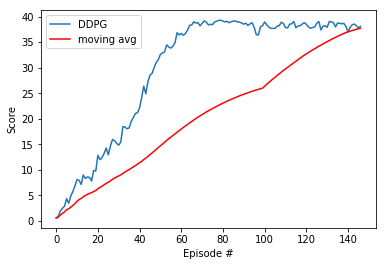

In [9]:
with active_session():
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
    scores, avgs = ddpg()
    env.close()
    
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores, label='DDPG')
    plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(loc='upper left')
    plt.show()

### Final Notes

#### Results

The agent completed the required 100 episodes at 30+ reward after a total of 147 episodes. The agent hit a clear plato around 38 reward score, and was mostly steady at the reward for the 100 iterations.

#### Future Improvements

I need a break before cooming back to monkey with this one. I think there is a lot of potential for improvement that I ran out of time to find. I think there would be a lot of potential in figuring out exactly why my 2 batch normalization layers were having trouble after a while, where the single layer performs very well. I also did not tweak the hyper paramters very much after finding out my batch normaization issue, so there is most likely room to improve there. 

The final area that would be nice to take a look at is the efficency of the learning. My solution takes a very long time to train, even on the provided work space. Well I do not think it is something that will instantly train, I do believe that I could find ways to reduce episode time well maintaining the reward rate shown above.